### Transfer learning is a deep learning technique where we use a pre-trained model. This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset (Transfer learning gives higher accuracy compared to training models from scratch)

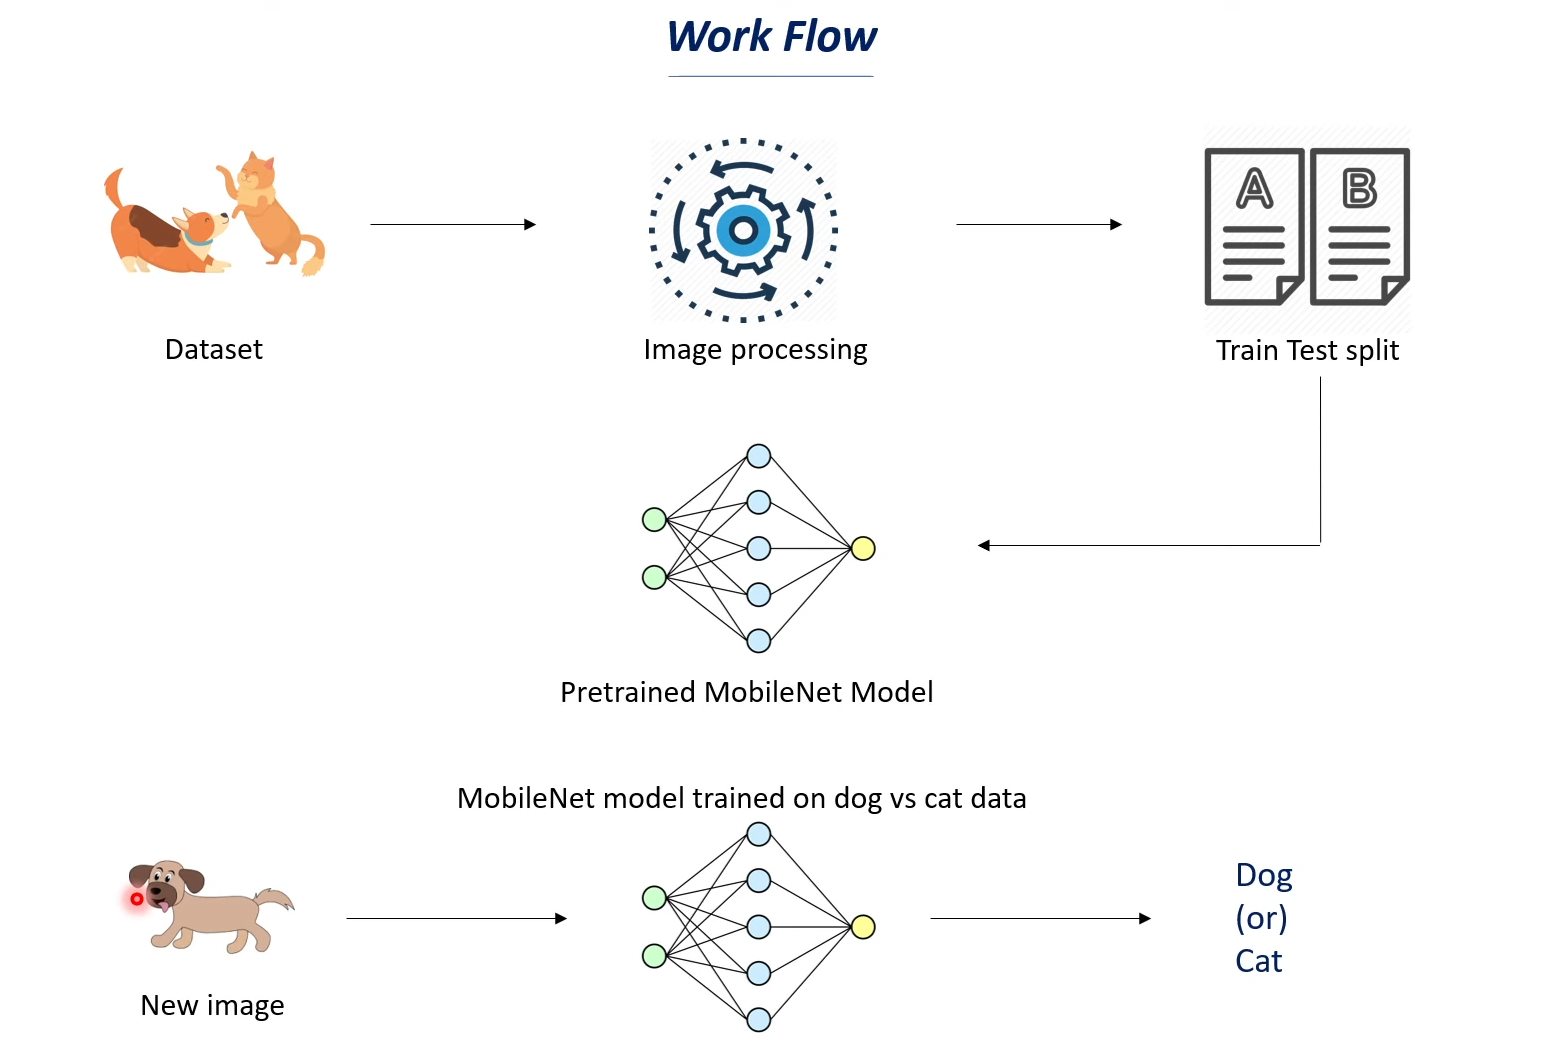

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir .p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
## kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:27<00:00, 32.8MB/s]
100% 812M/812M [00:27<00:00, 30.7MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'


with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
from zipfile import ZipFile

dataset = '/content/train.zip'


with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting number of files/images in train folder
path,dirs,files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


printing the names of images

In [8]:
file_names = os.listdir("/content/train")
print(file_names)

['dog.1493.jpg', 'dog.7471.jpg', 'cat.3153.jpg', 'cat.5416.jpg', 'cat.3735.jpg', 'dog.3061.jpg', 'dog.5618.jpg', 'cat.7261.jpg', 'dog.1024.jpg', 'cat.10066.jpg', 'cat.1299.jpg', 'cat.10429.jpg', 'dog.3632.jpg', 'cat.1063.jpg', 'cat.9256.jpg', 'cat.669.jpg', 'cat.7245.jpg', 'dog.6482.jpg', 'dog.3124.jpg', 'cat.6496.jpg', 'cat.3214.jpg', 'cat.2239.jpg', 'cat.1789.jpg', 'dog.160.jpg', 'cat.2686.jpg', 'cat.5751.jpg', 'dog.2355.jpg', 'cat.654.jpg', 'dog.3214.jpg', 'cat.12050.jpg', 'dog.1872.jpg', 'cat.4902.jpg', 'cat.1358.jpg', 'cat.11806.jpg', 'cat.9830.jpg', 'dog.5167.jpg', 'cat.9629.jpg', 'cat.4015.jpg', 'cat.11119.jpg', 'dog.5463.jpg', 'cat.8571.jpg', 'cat.11447.jpg', 'cat.1452.jpg', 'dog.6385.jpg', 'cat.578.jpg', 'dog.8674.jpg', 'dog.11662.jpg', 'dog.8591.jpg', 'dog.1231.jpg', 'cat.7240.jpg', 'cat.2729.jpg', 'dog.2729.jpg', 'cat.10434.jpg', 'cat.5760.jpg', 'cat.9791.jpg', 'dog.9508.jpg', 'cat.3354.jpg', 'cat.8825.jpg', 'cat.9534.jpg', 'cat.6511.jpg', 'cat.8187.jpg', 'dog.3579.jpg', 'do

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

#### displaying images of dogs and cats

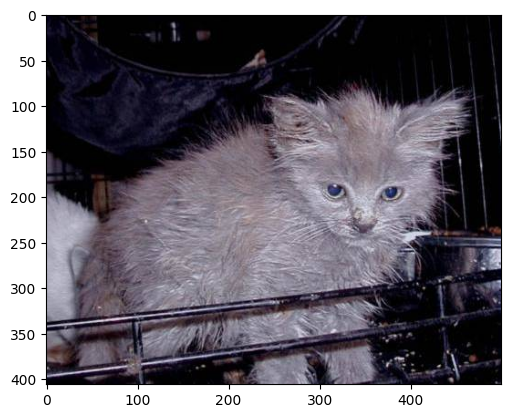

In [10]:
img = mpimg.imread('/content/train/cat.7984.jpg')
imgplot = plt.imshow(img)
plt.show()

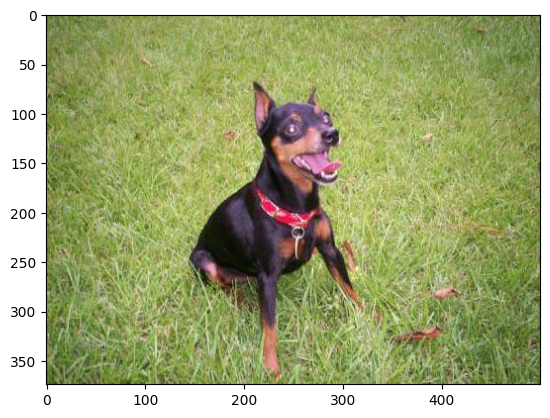

In [11]:
img = mpimg.imread('/content/train/dog.5500.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
## resizing all the images(in a different directory)


In [13]:
file_names = os.listdir("/content/train")

for i in range (5):
  name= file_names[i]
  print(name[0:3])

dog
dog
cat
cat
cat


In [14]:
file_names = os.listdir("/content/train")

dog_count =0
cat_count =0
for img_file in file_names:
  name=img_file[0:3]

  if name=='dog':
    dog_count+=1

  else:
   cat_count+=1

print(dog_count)
print(cat_count)

12500
12500


Resizing all images

In [15]:
# creating directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range (2000):

  filename=os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

Creating a label for resized images of dogs and cats

Cats--> 0
dogs-->1

In [25]:
filenames = os.listdir('/content/image resized/')
labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label=='dog':
    labels.append(1)

  else:
     labels.append(0)

In [26]:
print(filenames[0:5])
print(labels[0:5])

['dog.1493.jpg', 'dog.7471.jpg', 'cat.3153.jpg', 'cat.5416.jpg', 'cat.3735.jpg']
[1, 1, 0, 0, 0]


In [27]:
# counting the images of dogs and cats out of 2000 images
values , counts =np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1001  999]


Converting all the resized images to numpy arrays

In [28]:
import cv2
import glob

In [29]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files =[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [30]:
print(dog_cat_images)

[[[[ 65 146  91]
   [101 182 127]
   [ 88 169 114]
   ...
   [104 175 132]
   [100 171 128]
   [121 192 149]]

  [[ 57 138  83]
   [ 83 164 109]
   [ 76 157 102]
   ...
   [ 95 166 123]
   [ 88 159 116]
   [103 174 131]]

  [[ 59 139  86]
   [ 65 145  92]
   [ 57 137  84]
   ...
   [ 85 158 112]
   [ 75 147 101]
   [ 83 155 109]]

  ...

  [[ 77 107  88]
   [ 99 129 110]
   [102 132 113]
   ...
   [128 182 165]
   [134 187 173]
   [117 170 156]]

  [[ 74 107  86]
   [ 85 118  97]
   [ 73 106  85]
   ...
   [118 171 157]
   [119 172 158]
   [108 161 147]]

  [[102 135 114]
   [ 88 121 100]
   [ 57  90  69]
   ...
   [119 172 158]
   [121 174 160]
   [116 169 155]]]


 [[[ 31  31  25]
   [ 30  31  27]
   [ 28  29  27]
   ...
   [ 32  40  30]
   [ 35  43  33]
   [ 32  40  30]]

  [[ 33  33  27]
   [ 31  32  28]
   [ 29  32  30]
   ...
   [ 43  50  43]
   [ 42  49  42]
   [ 39  46  39]]

  [[ 34  36  30]
   [ 34  35  31]
   [ 30  33  31]
   ...
   [ 25  32  29]
   [ 22  29  26]
   [ 25  32

In [31]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [33]:
X = dog_cat_images
Y = np.asarray(labels)

In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [36]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [46]:
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)  # Check TensorFlow version
print(hub.__version__)  # Check TensorFlow Hub version

2.18.0
0.16.1


In [50]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the MobileNetV2 model from TensorFlow Hub
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Define the pretrained model as a Keras layer
pretrained_model = hub.KerasLayer(mobilenet_model, trainable=False)

num_of_classes = 2  # Number of output classes

# Build the model using the Functional API
input_layer = tf.keras.Input(shape=(224, 224, 3))  # Define input layer

# Wrap the pretrained_model call within a Lambda layer to defer execution
x = tf.keras.layers.Lambda(lambda inputs: pretrained_model(inputs))(input_layer)

output_layer = tf.keras.layers.Dense(num_of_classes, activation="softmax")(x)  # Output layer

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [53]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.6986 - loss: 0.5942
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 0.9634 - loss: 0.1032
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.9670 - loss: 0.0856
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - acc: 0.9766 - loss: 0.0591
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc: 0.9856 - loss: 0.0443


In [54]:
score ,acc = model.evaluate(X_test_scaled,Y_test)
print('Test loss= ',score)
print('Test accuracy= ',acc)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.9890 - loss: 0.0411
Test loss=  0.06350589543581009
Test accuracy=  0.9775000214576721


**Predicitve System**

path of the image to be predicted: /content/dog.jpg


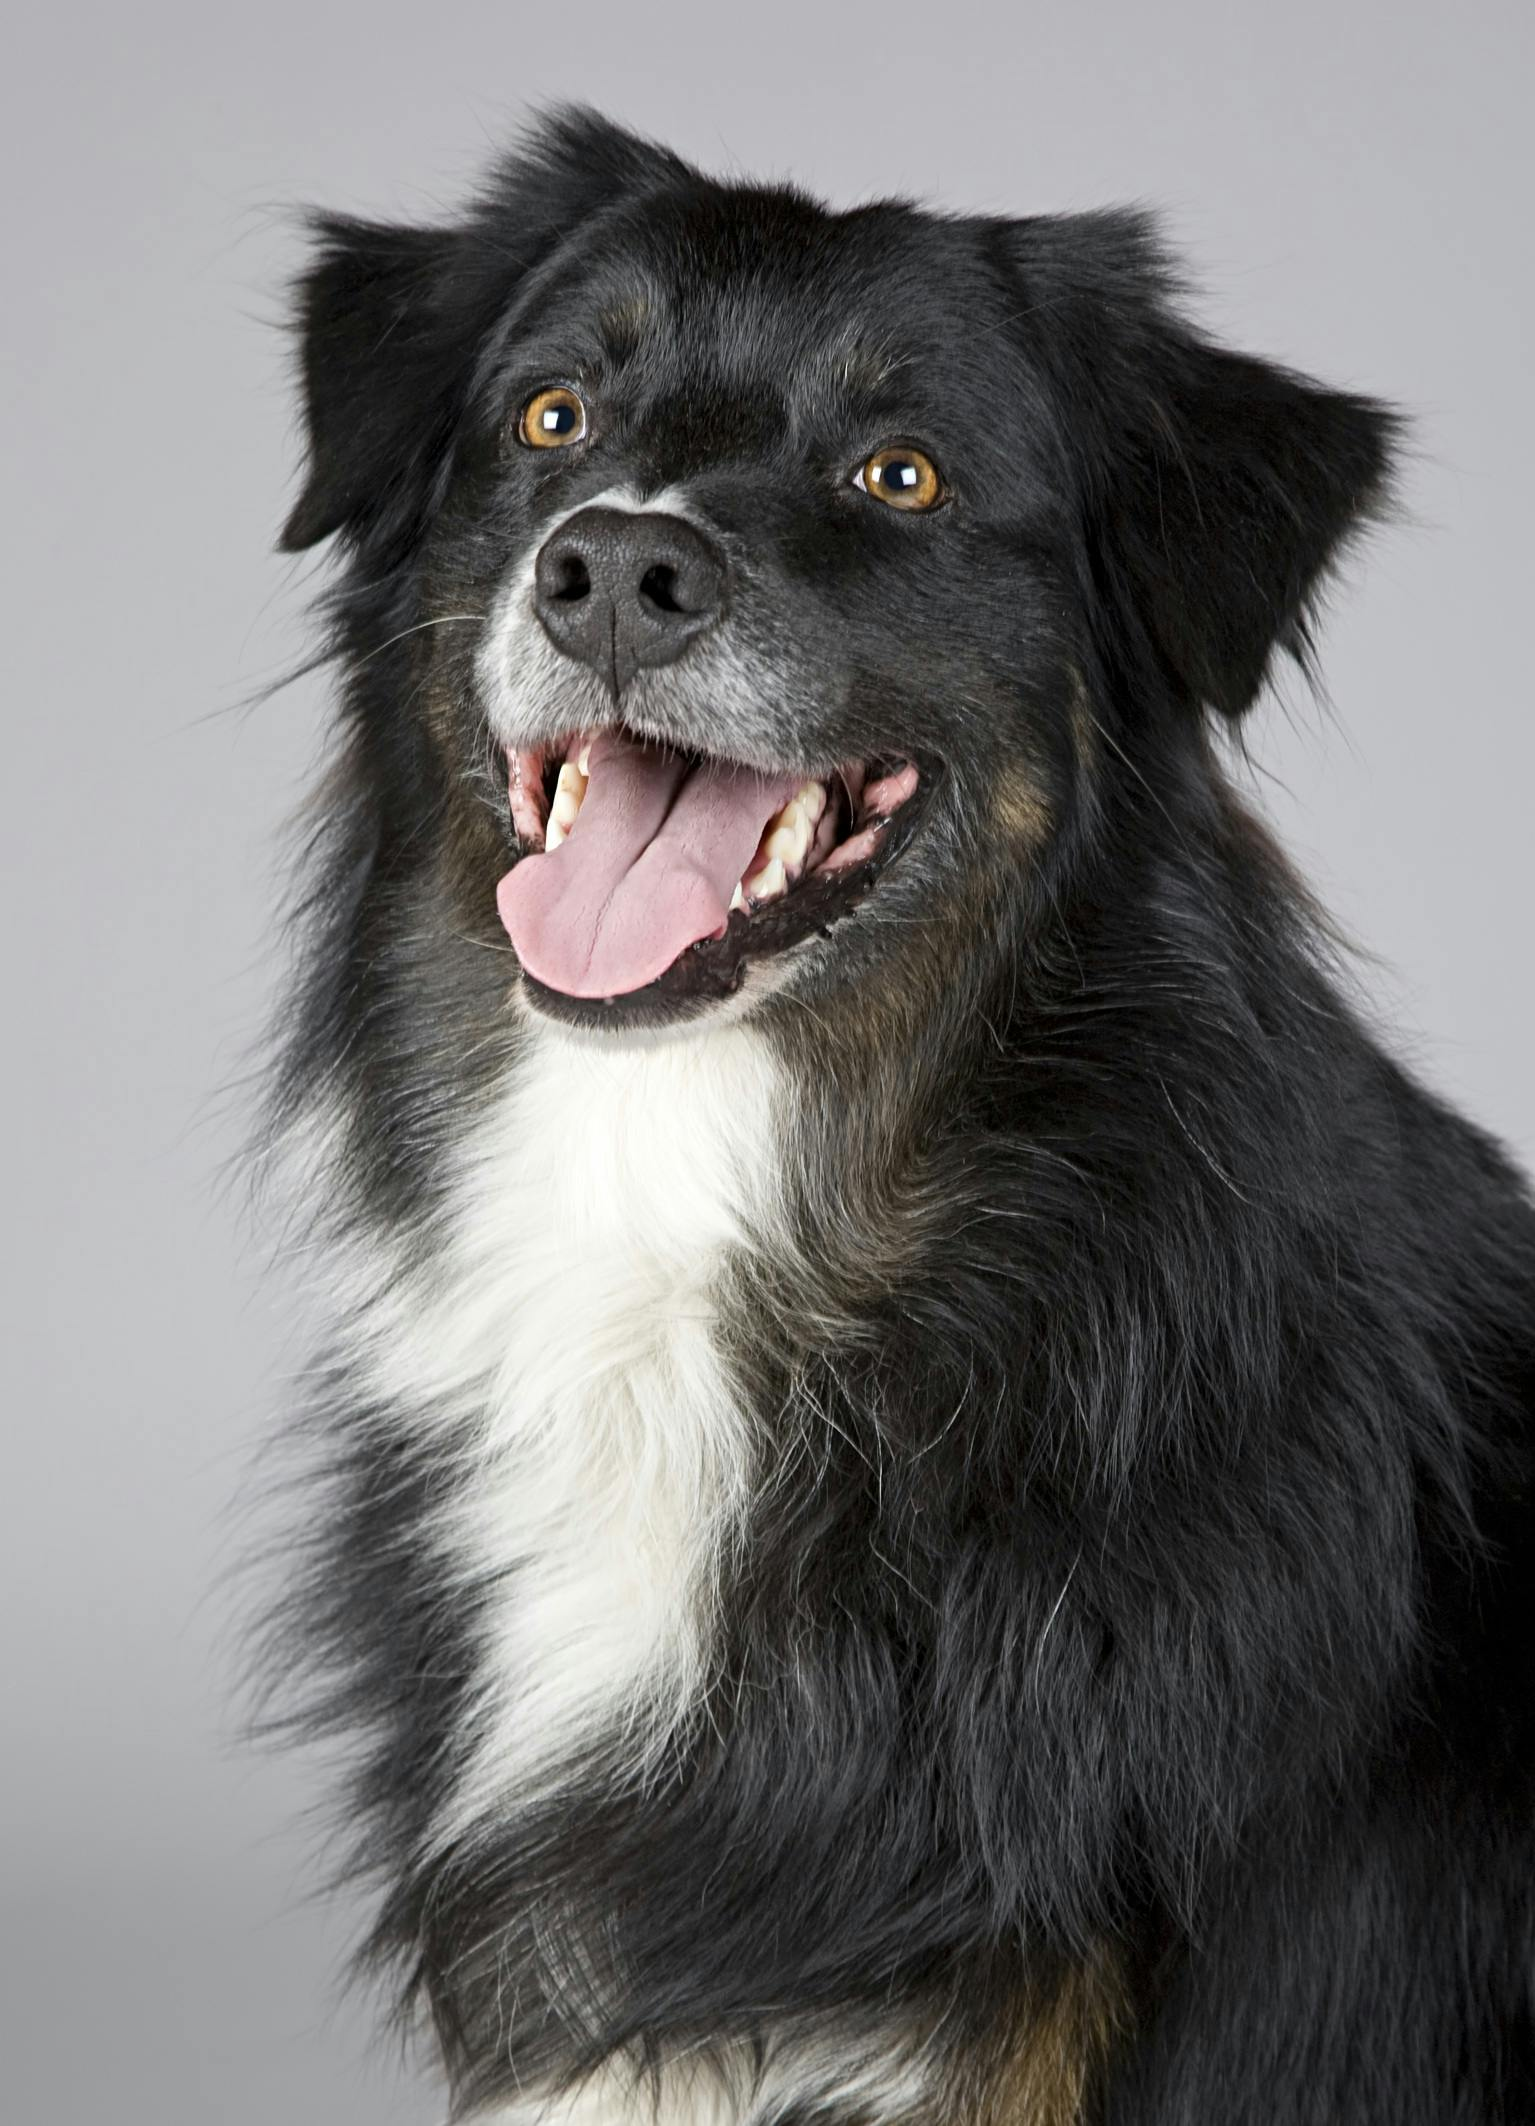

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[0.00809599 0.9919041 ]]
the image represent a dog


In [58]:
input_image_path = input('path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_prediction)

if input_pred_label == 0:
  print("the image represent a cat")

else:
  print('the image represent a dog')